## Libraries

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.utils import resample

## Data pre-processing and data cleaning

In [82]:
co2df = pd.read_csv('CO2_emissions.csv')
co2df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [83]:
energydf = pd.read_csv('global_renewable_energy_production.csv')
energydf.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


In [84]:
co2df.info()
energydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  240 non-null    int64  
 1   Country               240 non-null    object 
 2   SolarEnergy           240 non-null    float64
 3   WindEnergy            240 non-null    float64
 4   HydroEnergy           240 non-null    float64
 5   OtherRenewableEnergy  240 non-null    float64
 6   TotalRenewableEnergy  240 non-null    float64
dtypes:

As we can see above the dataframes that we will be using do not have any non-full values, and are the type of variable we needed to work with them.

In [85]:
#Just doble checking the non-full data given above
energydf.isnull().sum()

Year                    0
Country                 0
SolarEnergy             0
WindEnergy              0
HydroEnergy             0
OtherRenewableEnergy    0
TotalRenewableEnergy    0
dtype: int64

In [86]:
#Just doble checking the non-full data given above
co2df.isnull().sum()

country_code    0
country_name    0
year            0
value           0
dtype: int64

Now we will be checking the values included in the _Country_ column in _energydf_ dataframe to adapt the _co2df_ dataframe to the same countries

In [87]:
energyunique = energydf['Country'].unique()
energyunique

array(['USA', 'China', 'India', 'Germany', 'UK', 'France', 'Brazil',
       'Canada', 'Australia', 'Japan'], dtype=object)

In [88]:
co2unique = co2df['country_name'].unique()
co2unique

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding

Seeing which countries were included in both dataframes, we select the countries we want to keep from _co2df_

In [89]:
required_country = ['Australia', 'United States', 'China', 'India', 'Germany', 'United Kingdom', 'France', 'Brazil', 'Canada', 'Japan']
co2df = co2df[co2df['country_name'].isin(required_country)]
co2df.head()

,country_code,country_name,year,value
657,AUS,Australia,1960,88202.351
658,AUS,Australia,1961,90589.568
659,AUS,Australia,1962,94912.961
660,AUS,Australia,1963,101029.517
661,AUS,Australia,1964,108979.573


In [90]:
co2unique = co2df['country_name'].unique()
co2unique

array(['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'France',
       'United Kingdom', 'India', 'Japan', 'United States'], dtype=object)

In [91]:
# We change the change United Kingdom to UK and United States to USA, so we can work with the same name as in the energydf dataframe
co2df['country_name'] = co2df['country_name'].replace('United States', 'USA')
co2df['country_name'] = co2df['country_name'].replace('United Kingdom', 'UK')
co2df['country_name'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'France',
       'UK', 'India', 'Japan', 'USA'], dtype=object)

Once like this, we can be sure that the datasets are cleaned and ready to be used to answer the research questions

## First research question

What are the regional variations in the effectiveness of renewable energy production in reducing $CO_2$ emissions across different continents?


For this part we have to group the countries by region, in this case we will be gruoping them by continent, so Australia would go by itself; India, China and Japan would go together, Brazil by itself, Canada and USA would go together, and finally Germany, France and UK in the last.

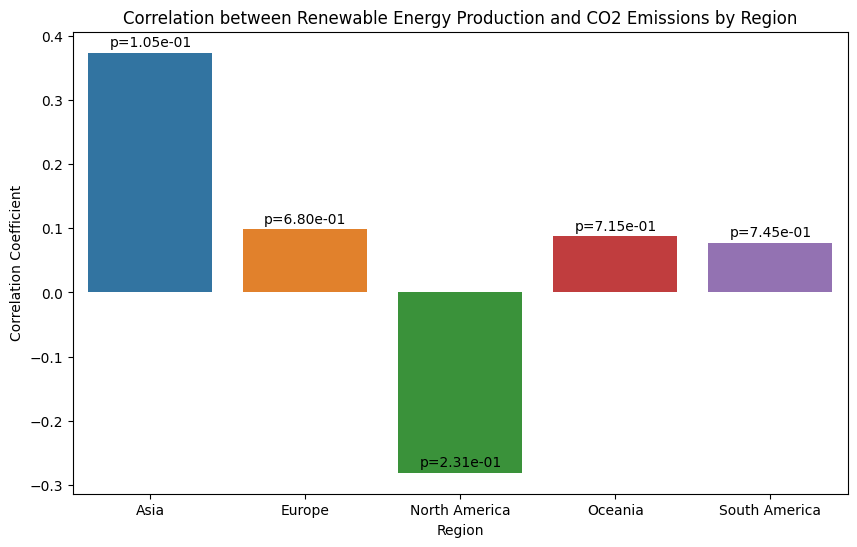

               Correlation   p-value
Region                              
Asia              0.373281  0.104997
Europe            0.098187  0.680466
North America    -0.280679  0.230648
Oceania           0.087246  0.714550
South America     0.077732  0.744622


In [92]:
region_map = {
    'Australia': 'Oceania',
    'Brazil': 'South America',
    'Canada': 'North America',
    'USA': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'France': 'Europe',
    'UK': 'Europe'
}

co2df['Region'] = co2df['country_name'].map(region_map)
energydf['Region'] = energydf['Country'].map(region_map)

# Aggregate the data by region and year
co2_by_region = co2df.groupby(['Region', 'year'])['value'].sum().reset_index()
energy_by_region = energydf.groupby(['Region', 'Year'])['TotalRenewableEnergy'].sum().reset_index()

# Merge the datasets on Region and Year
merged_df = pd.merge(co2_by_region, energy_by_region, left_on=['Region', 'year'], right_on=['Region', 'Year'])
merged_df.drop('Year', axis=1, inplace=True)

# Calculate the correlation between renewable energy production and CO2 emissions for each region
correlations = merged_df.groupby('Region').apply(lambda x: x[['value', 'TotalRenewableEnergy']].corr().iloc[0, 1])

# Significance Testing: Calculate p-values for the correlations
p_values = merged_df.groupby('Region').apply(lambda x: stats.pearsonr(x['value'], x['TotalRenewableEnergy'])[1])

# Plot the correlations with significance
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
for i, p in enumerate(p_values):
    plt.text(i, correlations[i] + 0.01, f'p={p:.2e}', ha='center')
plt.title('Correlation between Renewable Energy Production and CO2 Emissions by Region')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Region')
plt.show()

# Display the correlations and p-values for each region
correlation_significance_df = pd.DataFrame({
    'Correlation': correlations,
    'p-value': p_values
})
print(correlation_significance_df)



## Second research question

How do different types of renewable energy sources (e.g., solar, wind, hydro) individually correlate with $CO_2$​ emissions reduction?

C:\Users\pedro\AppData\Local\Temp\ipykernel_37480\3482256340.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  energy_by_country = energydf.groupby(['Country', 'Year']).sum().reset_index()


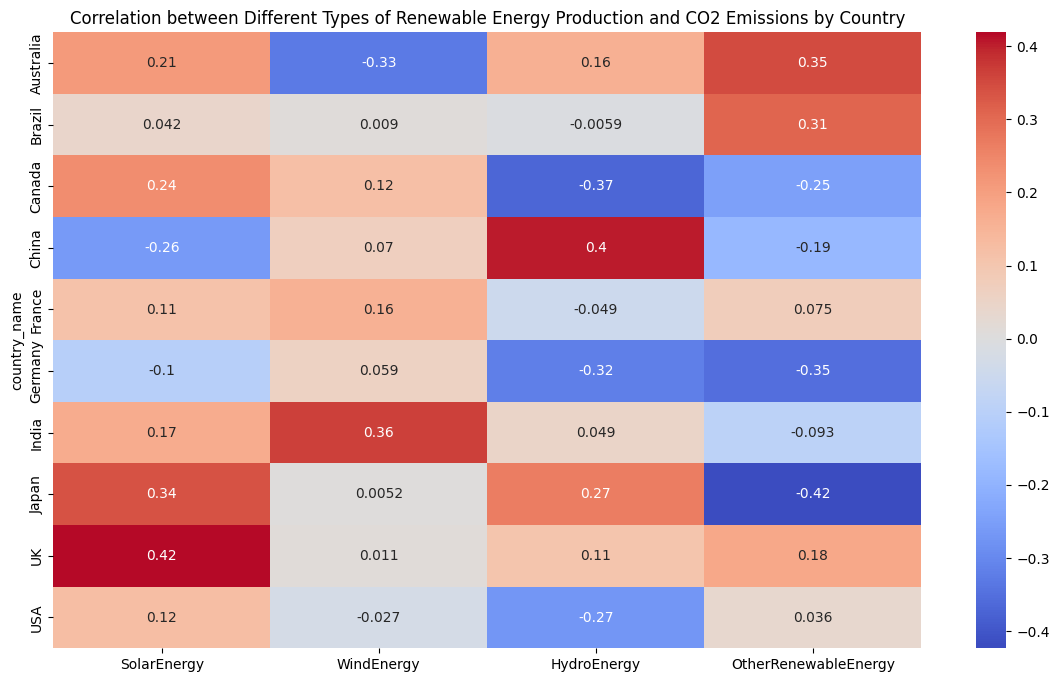

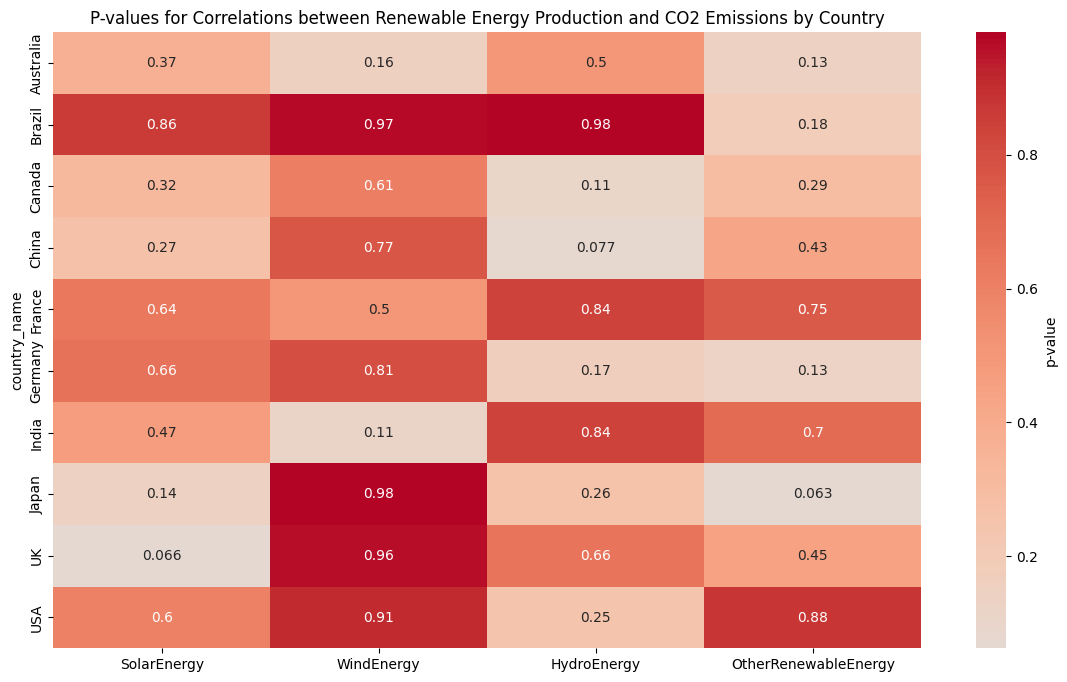

Correlations:
              SolarEnergy  WindEnergy  HydroEnergy  OtherRenewableEnergy
country_name                                                            
Australia        0.210387   -0.329472     0.159901              0.347303
Brazil           0.042494    0.009028    -0.005886              0.309784
Canada           0.235564    0.120962    -0.369482             -0.247106
China           -0.259036    0.069907     0.404379             -0.185221
France           0.110351    0.158977    -0.048541              0.074763
Germany         -0.104525    0.058735    -0.319439             -0.353662
India            0.169519    0.363859     0.049483             -0.093191
Japan            0.339619    0.005198     0.265382             -0.423541
UK               0.419183    0.011011     0.106054              0.179687
USA              0.123261   -0.027067    -0.270211              0.036242

P-values:
              SolarEnergy  WindEnergy  HydroEnergy  OtherRenewableEnergy
country_name              

In [93]:
# Aggregate the data by country and year
co2_by_country = co2df.groupby(['country_name', 'year'])['value'].sum().reset_index()
energy_by_country = energydf.groupby(['Country', 'Year']).sum().reset_index()

# Merge the datasets on Country and Year
merged_df = pd.merge(co2_by_country, energy_by_country, left_on=['country_name', 'year'], right_on=['Country', 'Year'])
merged_df.drop('Year', axis=1, inplace=True)

# Calculate the correlation and p-value between each type of renewable energy production and CO2 emissions for each country
renewable_sources = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']
correlations = {}
p_values = {}

for source in renewable_sources:
    correlations[source] = merged_df.groupby('country_name').apply(lambda x: x[['value', source]].corr().iloc[0, 1])
    p_values[source] = merged_df.groupby('country_name').apply(lambda x: stats.pearsonr(x['value'], x[source])[1])

# Convert the correlations and p-values to DataFrames for easier visualization
correlation_df = pd.DataFrame(correlations)
p_value_df = pd.DataFrame(p_values)

# Plot the correlations for each renewable energy source by country with p-values
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation between Different Types of Renewable Energy Production and CO2 Emissions by Country')
plt.show()

# Plot the p-values to assess statistical significance
plt.figure(figsize=(14, 8))
sns.heatmap(p_value_df, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'p-value'})
plt.title('P-values for Correlations between Renewable Energy Production and CO2 Emissions by Country')
plt.show()

# Display the correlation and p-value DataFrames
print("Correlations:")
print(correlation_df)
print("\nP-values:")
print(p_value_df)


## Third research question

What are the long-term projections for $CO_2$​ emissions if current trends in renewable energy production and energy consumption continue, and how do these projections compare with the targets set by SDG 13?

R-squared value on test set: 0.9950


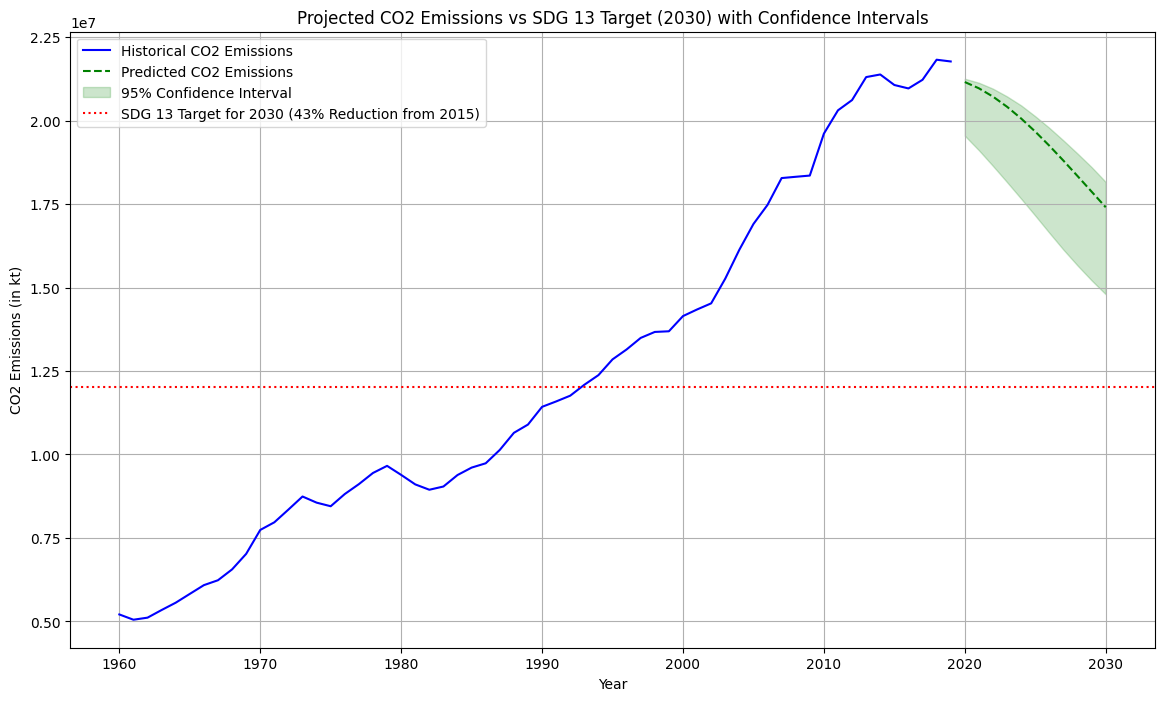

In [94]:
# Group CO2 data by year and sum emissions
co2_global = co2df.groupby('year')['value'].sum().reset_index()

# Prepare the data for SVR
X = co2_global['year'].values.reshape(-1, 1)
y = co2_global['value'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test set to evaluate performance
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate the R-squared value for the test set predictions
r2 = r2_score(y_test, y_test_pred)
print(f'R-squared value on test set: {r2:.4f}')

# Predict future values (up to 2030)
future_years = np.arange(2020, 2031).reshape(-1, 1)
future_years_scaled = scaler_X.transform(future_years)
predictions_scaled = svr_model.predict(future_years_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# Calculate the target for 2030
emissions_2015 = co2_global[co2_global['year'] == 2015]['value'].values[0]
target_2030 = emissions_2015 * 0.57

# Generate bootstrap samples for confidence intervals
bootstrap_samples = 1000
bootstrap_predictions = []

for _ in range(bootstrap_samples):
    X_resampled, y_resampled = resample(X_train_scaled, y_train_scaled)
    svr_model.fit(X_resampled, y_resampled)
    future_predictions_scaled = svr_model.predict(future_years_scaled)
    future_predictions = scaler_y.inverse_transform(future_predictions_scaled.reshape(-1, 1)).ravel()
    bootstrap_predictions.append(future_predictions)

# Calculate the mean and 95% confidence intervals for the predictions
bootstrap_predictions = np.array(bootstrap_predictions)
mean_predictions = np.mean(bootstrap_predictions, axis=0)
lower_bound = np.percentile(bootstrap_predictions, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_predictions, 97.5, axis=0)

# Plot the results with confidence intervals
plt.figure(figsize=(14, 8))
plt.plot(co2_global['year'], co2_global['value'], label='Historical CO2 Emissions', color='blue')
plt.plot(future_years, predictions, label='Predicted CO2 Emissions', color='green', linestyle='--')
plt.fill_between(future_years.ravel(), lower_bound, upper_bound, color='green', alpha=0.2, label='95% Confidence Interval')
plt.axhline(target_2030, color='red', linestyle=':', label='SDG 13 Target for 2030 (43% Reduction from 2015)')
plt.title('Projected CO2 Emissions vs SDG 13 Target (2030) with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (in kt)')
plt.legend()
plt.grid(True)
plt.show()


R-squared value on test set: 0.9572


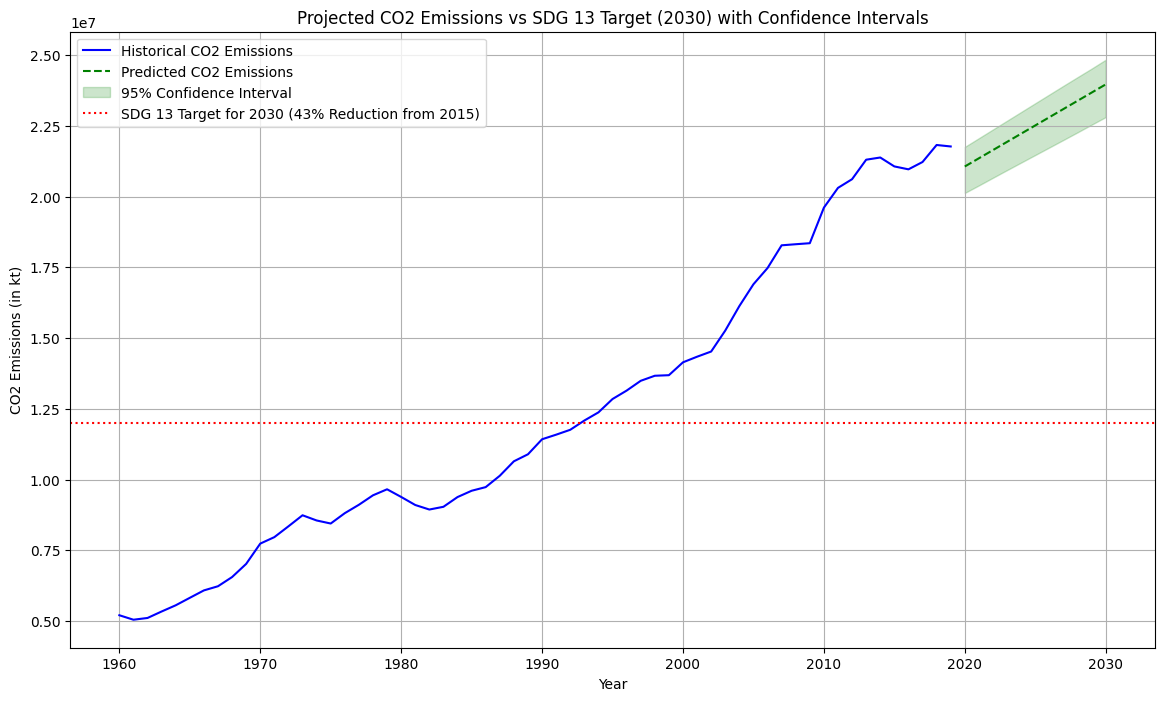

In [95]:
from sklearn.linear_model import LinearRegression

# Group CO2 data by year and sum emissions
co2_global = co2df.groupby('year')['value'].sum().reset_index()

# Prepare the data for Linear Regression
X = co2_global['year'].values.reshape(-1, 1)
y = co2_global['value'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set to evaluate performance
y_test_pred = linear_model.predict(X_test)

# Calculate the R-squared value for the test set predictions
r2 = r2_score(y_test, y_test_pred)
print(f'R-squared value on test set: {r2:.4f}')

# Predict future values (up to 2030)
future_years = np.arange(2020, 2031).reshape(-1, 1)
predictions = linear_model.predict(future_years)

# Calculate the target for 2030
emissions_2015 = co2_global[co2_global['year'] == 2015]['value'].values[0]
target_2030 = emissions_2015 * 0.57

# Generate bootstrap samples for confidence intervals
bootstrap_samples = 1000
bootstrap_predictions = []

for _ in range(bootstrap_samples):
    X_resampled, y_resampled = resample(X_train, y_train)
    linear_model.fit(X_resampled, y_resampled)
    future_predictions = linear_model.predict(future_years)
    bootstrap_predictions.append(future_predictions)

# Calculate the mean and 95% confidence intervals for the predictions
bootstrap_predictions = np.array(bootstrap_predictions)
mean_predictions = np.mean(bootstrap_predictions, axis=0)
lower_bound = np.percentile(bootstrap_predictions, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_predictions, 97.5, axis=0)

# Plot the results with confidence intervals
plt.figure(figsize=(14, 8))
plt.plot(co2_global['year'], co2_global['value'], label='Historical CO2 Emissions', color='blue')
plt.plot(future_years, predictions, label='Predicted CO2 Emissions', color='green', linestyle='--')
plt.fill_between(future_years.ravel(), lower_bound, upper_bound, color='green', alpha=0.2, label='95% Confidence Interval')
plt.axhline(target_2030, color='red', linestyle=':', label='SDG 13 Target for 2030 (43% Reduction from 2015)')
plt.title('Projected CO2 Emissions vs SDG 13 Target (2030) with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (in kt)')
plt.legend()
plt.grid(True)
plt.show()
